<a href="https://colab.research.google.com/github/AbderBouni/Graph-Theory-Notebook/blob/main/Predict_liens_et_element_Influenceurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import networkx as nx
import numpy as np
from scipy.io import mmread
import urllib.request
import matplotlib.pyplot as plt

# Partie 1 : Detection des acteurs influenceurs

In [104]:
# Implementation de la fonction plot avec differente mesure de centralitées
def local_rank_centrality_def(G, order):
    # Calculate local ranks for each node
    local_ranks = {}
    for node in G.nodes():
        neighbors = set(nx.single_source_shortest_path_length(G, node, cutoff=order).keys())
        node_degree = G.degree(node)
        local_rank = sum(G.degree(neighbor) for neighbor in neighbors) / node_degree if node_degree > 0 else 0
        local_ranks[node] = local_rank

    # Calculate global ranks for each node
    global_ranks = {}
    for node in G.nodes():
        neighbors = set(nx.single_source_shortest_path_length(G, node, cutoff=order).keys())
        global_rank = sum(local_ranks[neighbor] for neighbor in neighbors) / len(neighbors) if neighbors else 0
        global_ranks[node] = global_rank

    # Normalize global ranks
    total_rank = sum(global_ranks.values())
    normalized_ranks = {node: rank / total_rank for node, rank in global_ranks.items()}

    return normalized_ranks

def influence(G) :
      plt.figure(figsize=(24, 10))
      plt.subplot(232)
      nx.draw(G, with_labels=True,pos=nx.spring_layout(G))
      plt.title("Graphe originale")
      #Centralitée
      degree_centrality = nx.degree_centrality(G)
      #Closeness
      closeness_centrality = nx.closeness_centrality(G)
      #beetweeness
      betweenness_centrality = nx.betweenness_centrality(G)
      #Local rank
      local_rank_centrality = local_rank_centrality_def(G,4)
      #Plot
      plt.subplot(234)
      nx.draw(G, with_labels=True, node_size=[v * 4000 for _, v in degree_centrality.items()], node_color='skyblue', font_size=8,arrows=False)
      plt.title("Degree Centrality")

      plt.subplot(235)
      nx.draw(G, with_labels=True, node_size=[v * 2500 for _, v in betweenness_centrality.items()], node_color='lightgreen', font_size=8,arrows=False)
      plt.title("Betweenness Centrality")

      plt.subplot(236)
      nx.draw(G, with_labels=True, node_size=[v * 2000 for _, v in closeness_centrality.items()], node_color='salmon', font_size=8,arrows=False)
      plt.title("Closeness Centrality")

      plt.subplot(233)
      nx.draw(G, with_labels=True, node_size=[v * 2000 for _, v in local_rank_centrality.items()], node_color='black', font_size=8,arrows=False)
      plt.title("Local Rank Centrality")

      plt.tight_layout()
      plt.show()

# Partie 2 : Prédiction des liens

In [105]:
from itertools import combinations
def jaccard_similarity(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    if len(neighbors1) == 0 or len(neighbors2) == 0:
        return 0
    return len(neighbors1.intersection(neighbors2)) / len(neighbors1.union(neighbors2))

def predict_new_edges(G):
    potential_edges = []
    existing_edges = set(G.edges())
    for node1, node2 in combinations(G.nodes(), 2):
        if (node1, node2) not in existing_edges and (node2, node1) not in existing_edges:
            similarity = jaccard_similarity(G, node1, node2)
            potential_edges.append(((node1, node2), similarity))
    potential_edges.sort(key=lambda x: x[1], reverse=True)
    return potential_edges

def draw_graph_with_predicted_edges(G, predicted_edges):
    plt.figure(figsize=(15, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=8)
    for edge, similarity in predicted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=2.0, alpha=similarity, edge_color=(0, 0, similarity))
    plt.title("Graph with Predicted New Edges")
    plt.show()

# Partie 3 : Application sur les différents Graphes

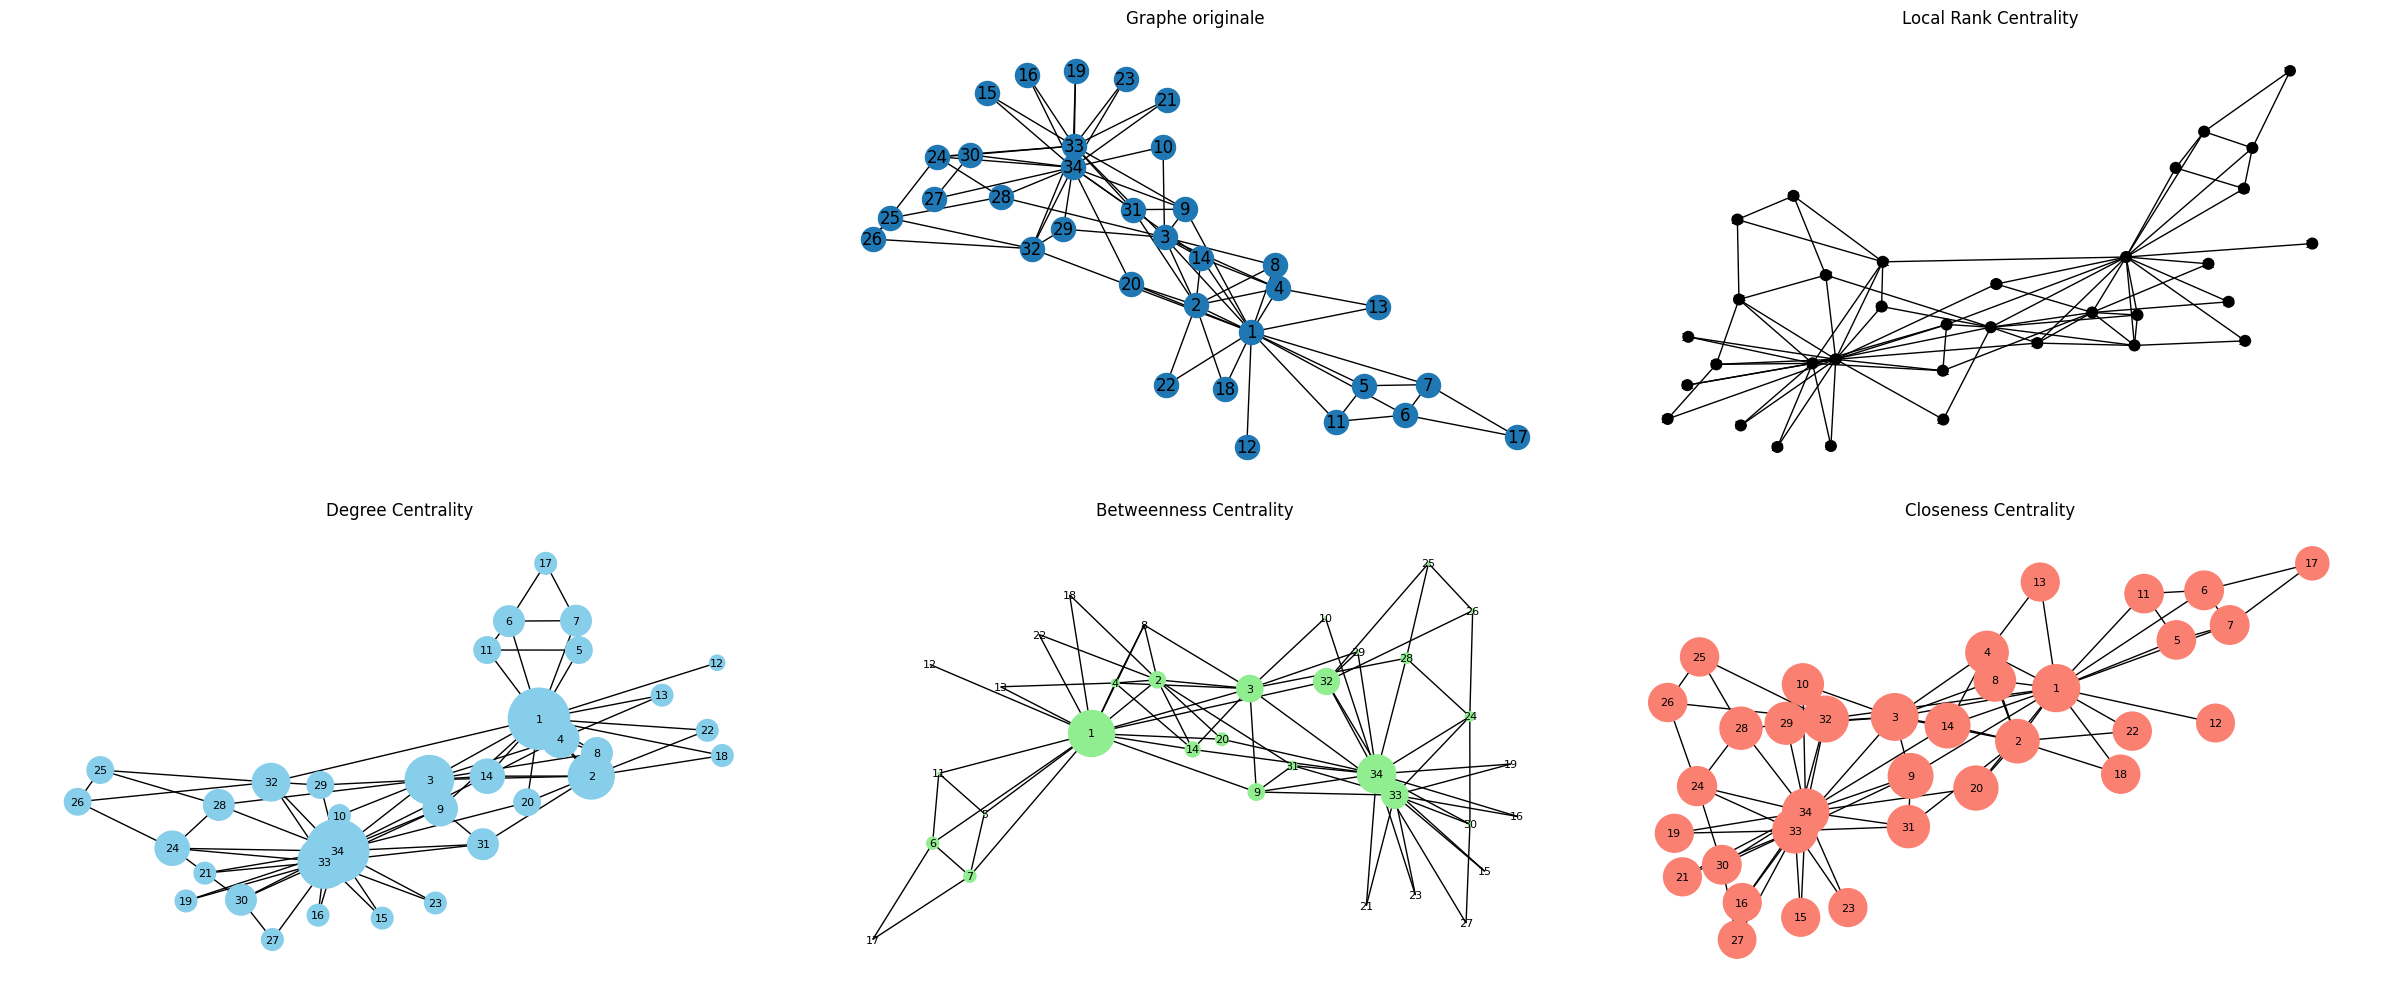

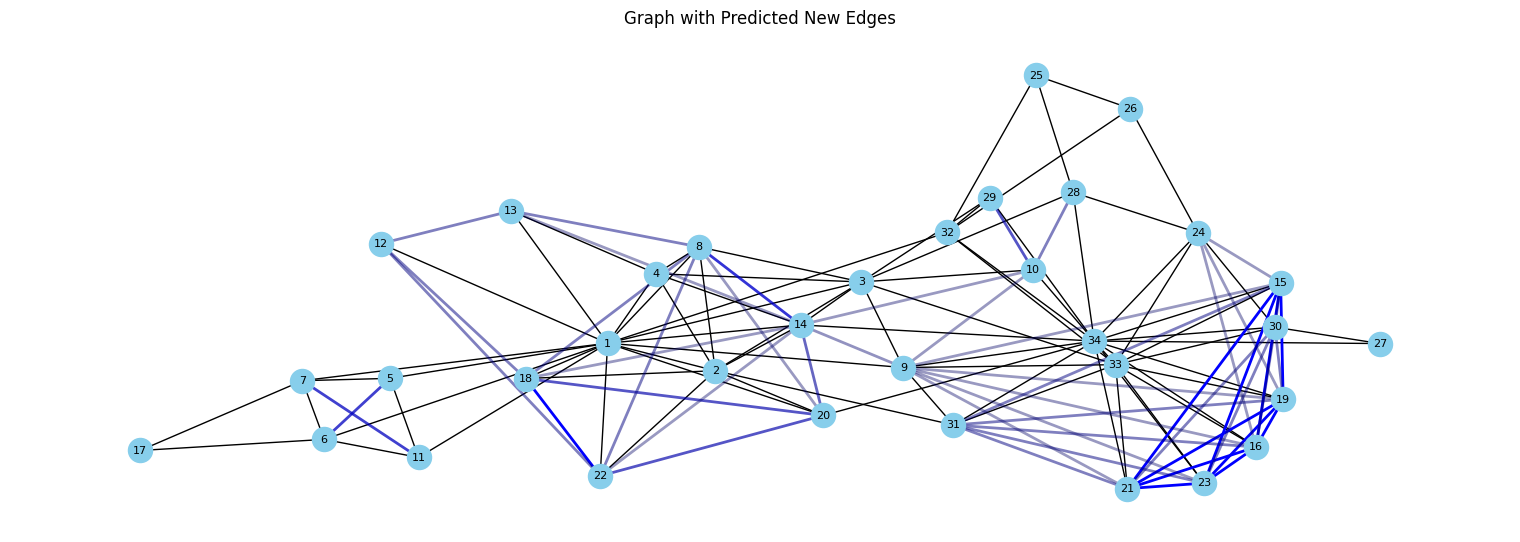

In [106]:
#Karate Graph
url = "https://raw.githubusercontent.com/adhishthite/GraphAnalysis/master/karate.gml"
urllib.request.urlretrieve(url, "/content/karate.gml")
G = nx.read_gml('karate.gml', label = 'id')

influence(G)
predicted_edges = predict_new_edges(G)
draw_graph_with_predicted_edges(G, predicted_edges[:50])

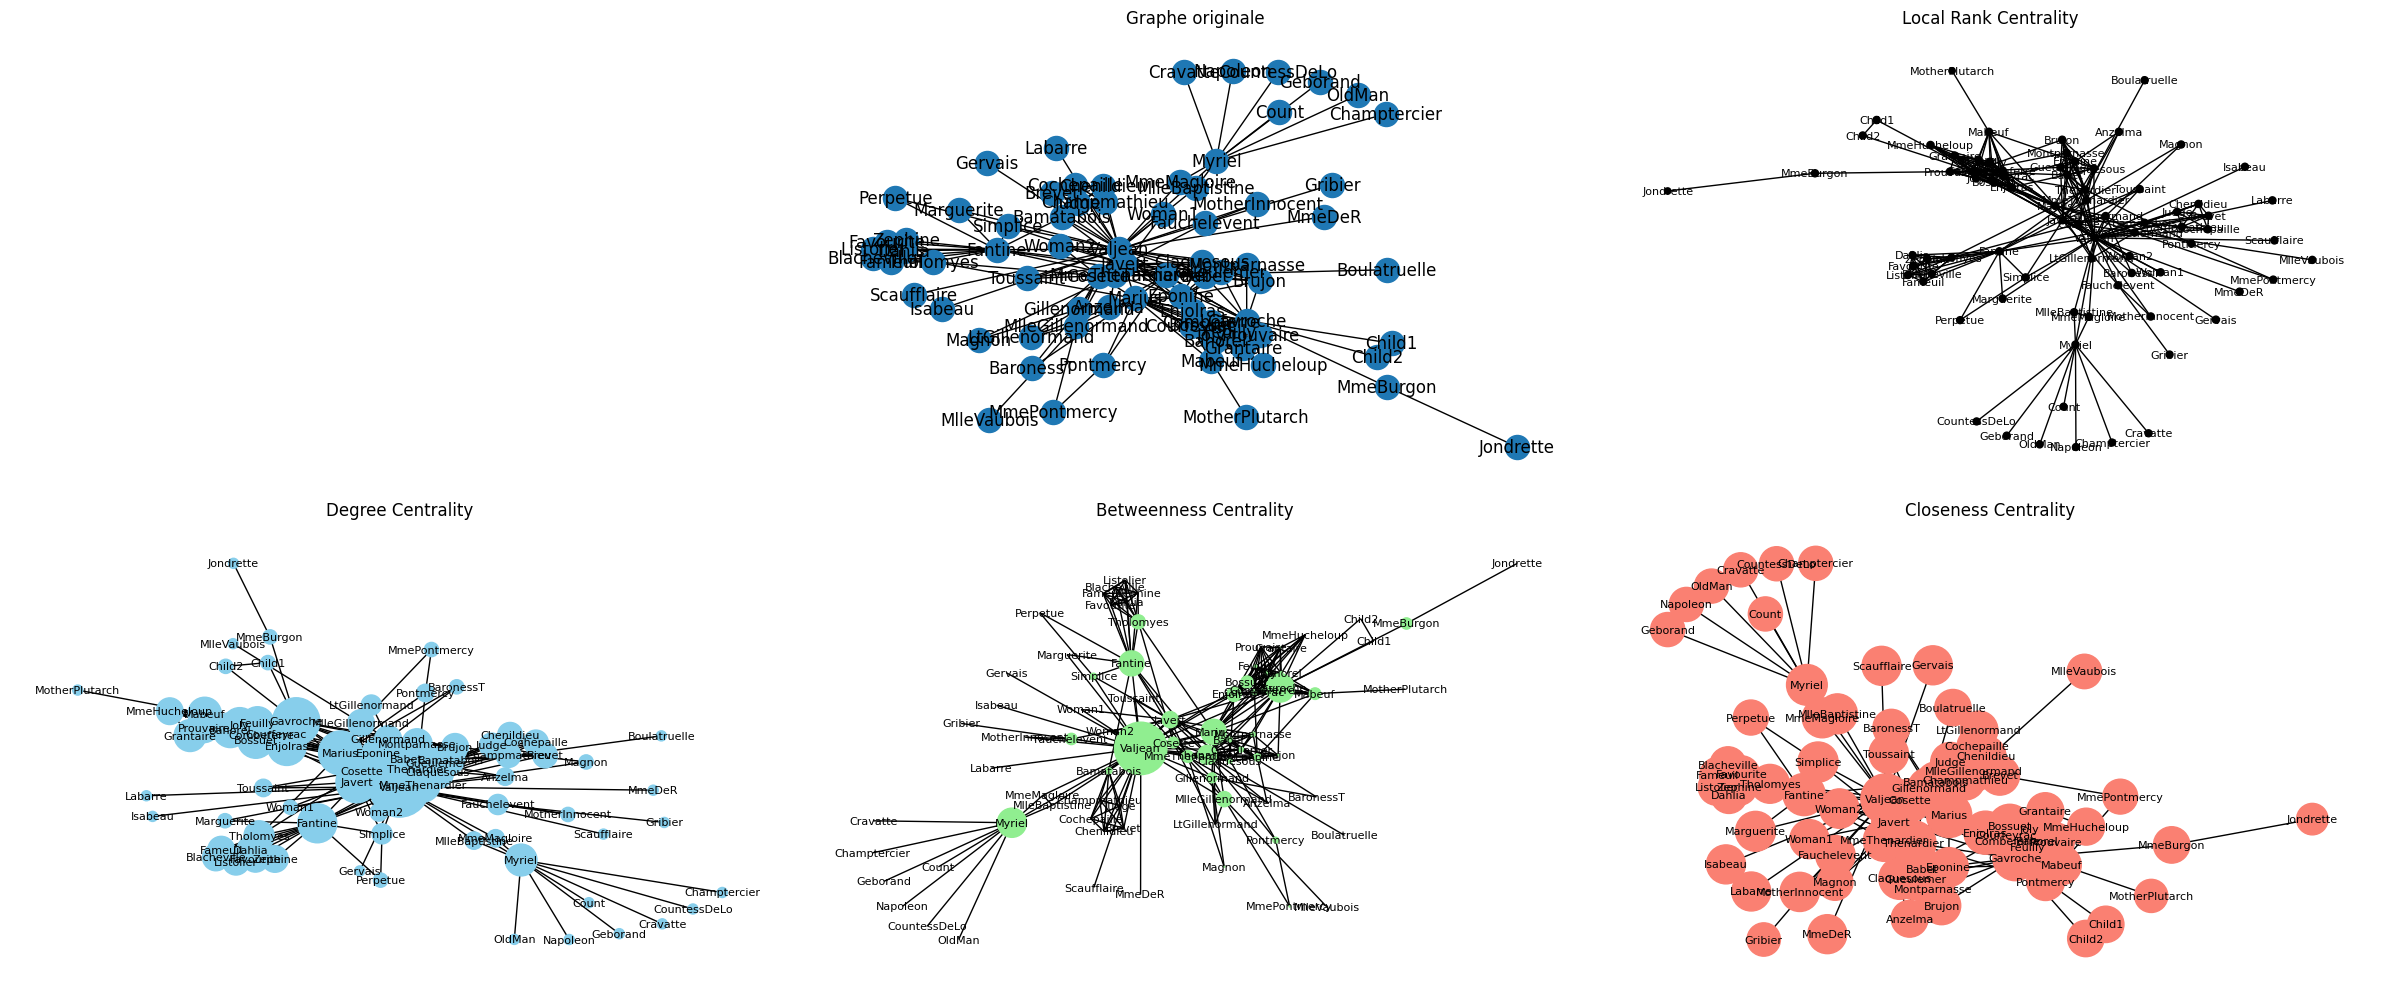

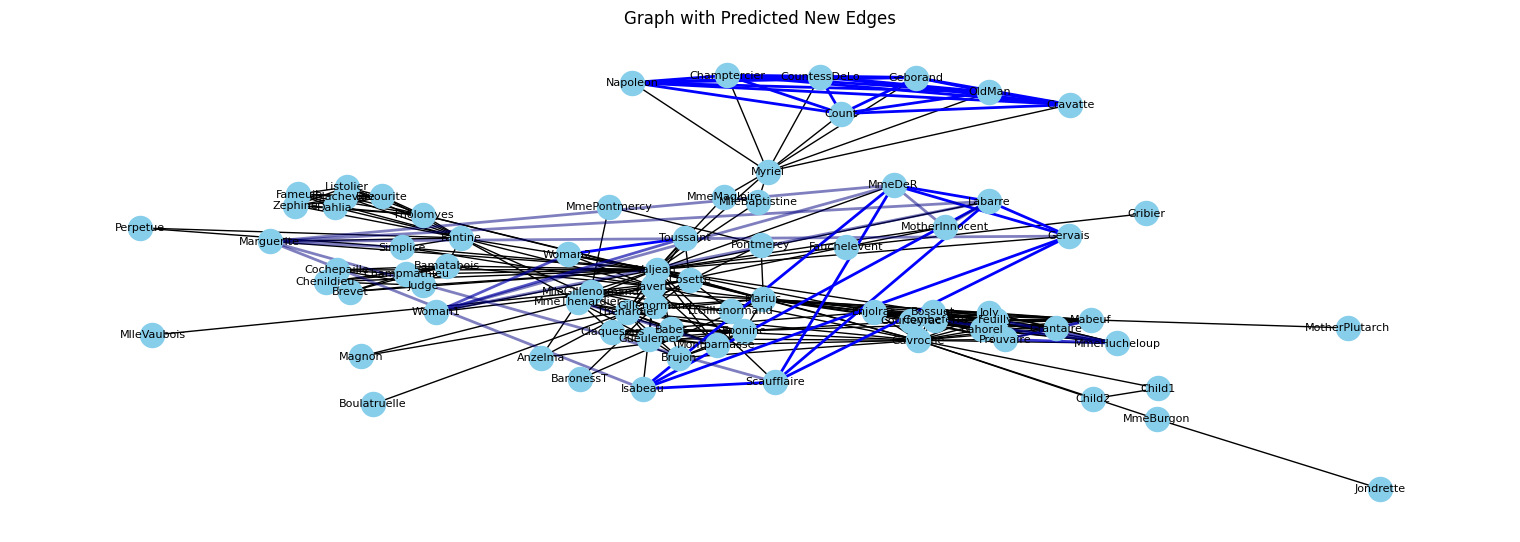

In [107]:
#Les miserables Graph
G1=nx.les_miserables_graph()

influence(G1)
predicted_edges = predict_new_edges(G1)
draw_graph_with_predicted_edges(G1, predicted_edges[:50])

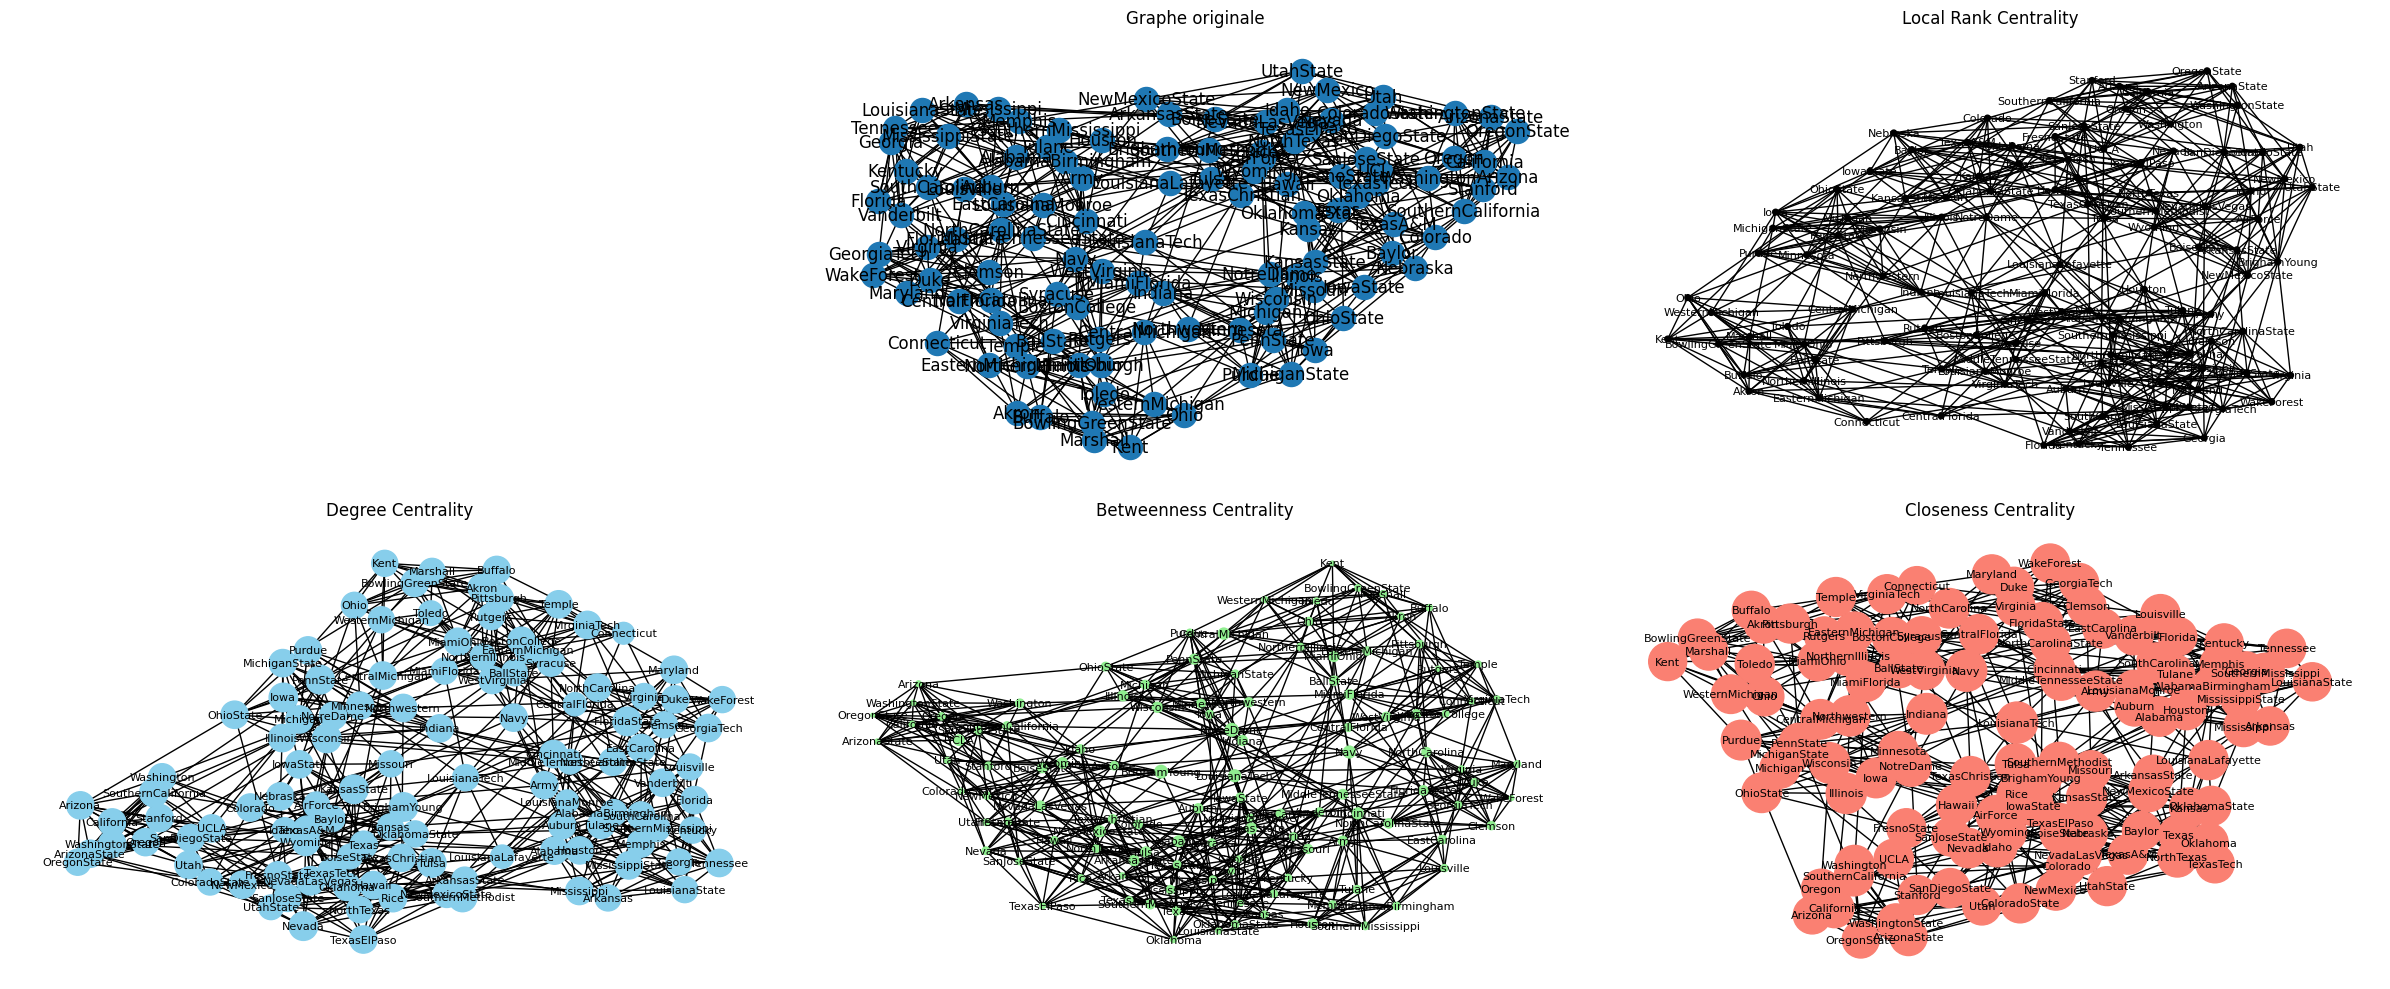

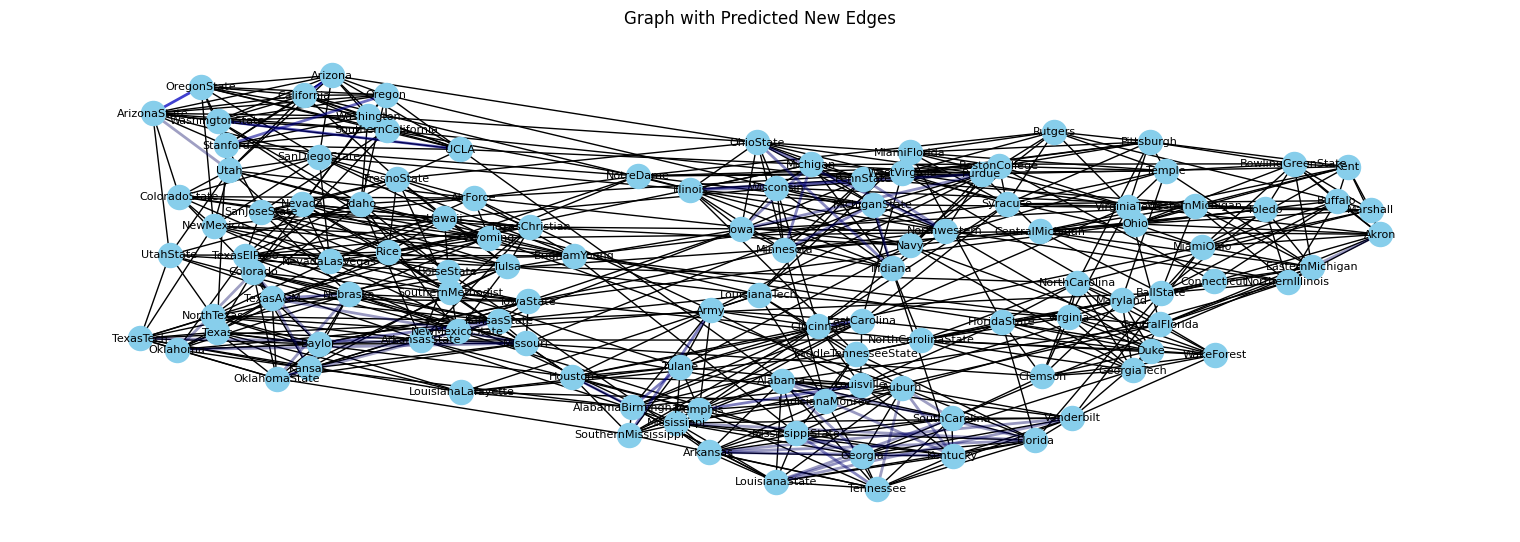

In [108]:
#American college football Graph
url = "https://raw.githubusercontent.com/vlivashkin/community-graphs/master/gml_graphs/football.gml"
urllib.request.urlretrieve(url, "/content/football.gml")
G2 = nx.read_gml('football.gml')

influence(G2)
predicted_edges = predict_new_edges(G2)
draw_graph_with_predicted_edges(G2, predicted_edges[:50])

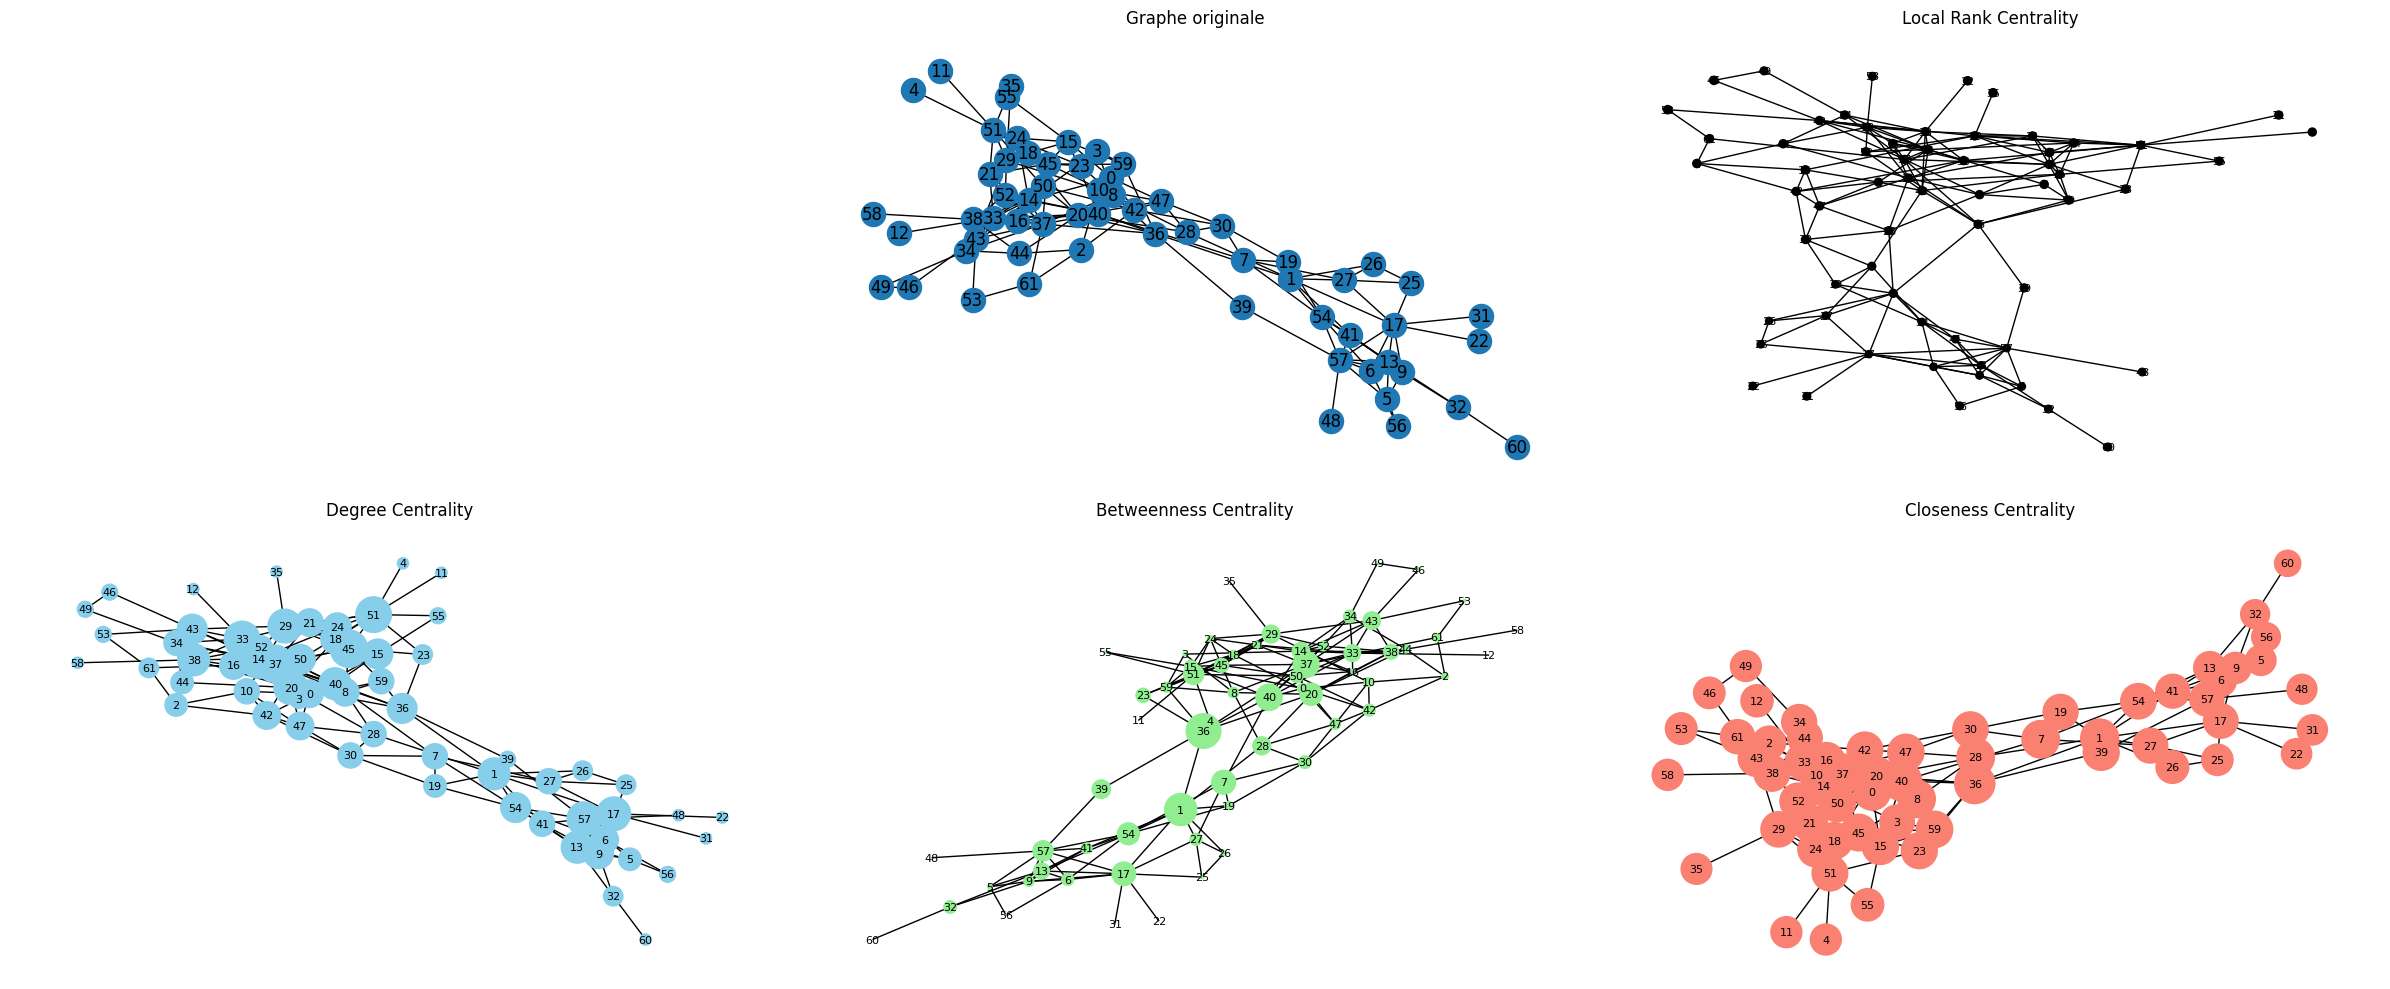

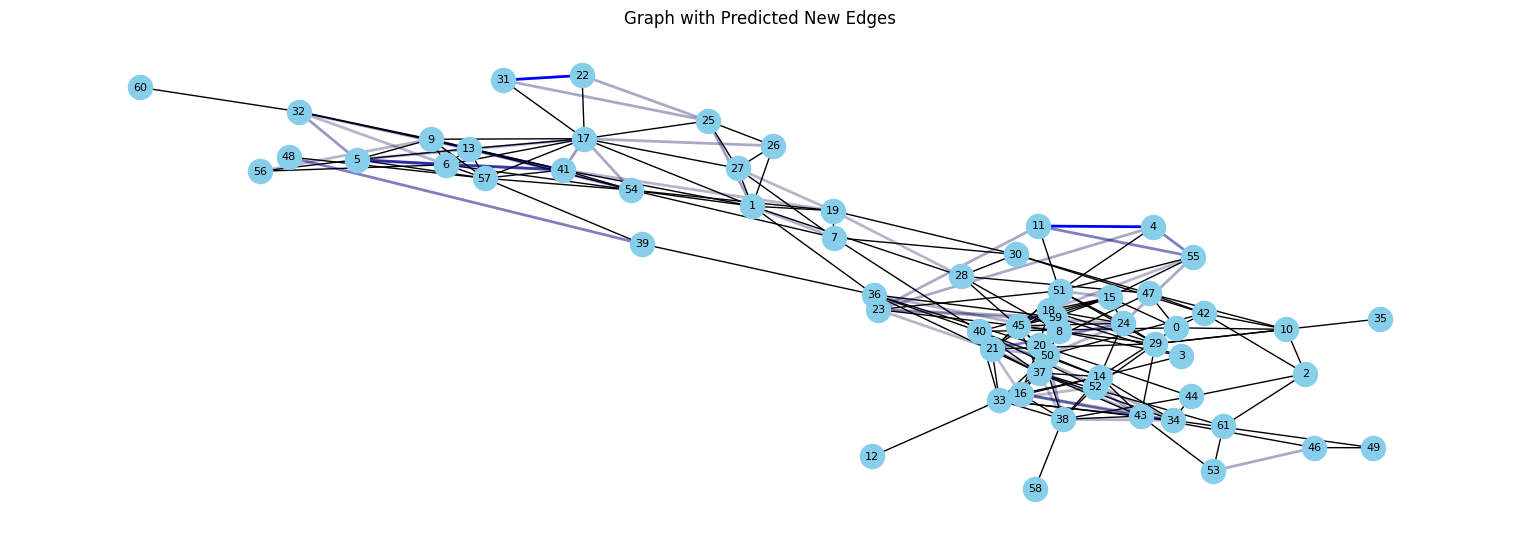

In [109]:
#Dolphin Graph
url = "https://raw.githubusercontent.com/vlivashkin/community-graphs/master/gml_graphs/dolphins.gml"
urllib.request.urlretrieve(url, "/content/dolphins.gml")
G3 = nx.read_gml('dolphins.gml')

influence(G3)
predicted_edges = predict_new_edges(G3)
draw_graph_with_predicted_edges(G3, predicted_edges[:50])